In [20]:
import pandas as pd
import os
import sys
import yaml
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [21]:
# Get the current working directory
current_dir = os.getcwd() 

# Calculate the parent directory (or the project root)
project_root = os.path.dirname(current_dir)

# Append it to sys.path
sys.path.append(project_root)

In [22]:
# Define the paths relative to the project root
relative_head_path = r"data\Head\metrics_head_new.json"
relative_neckHead_path = r"data\NeckHead\metrics_neckHead_new.json"
relative_entireModel_path = r"data\EntireModel\metrics_entireModel_new.json"
relative_classes_path = r"configs\data.yaml"

# Join the project root with the relative paths to get the correct absolute paths
head_path = os.path.join(project_root, relative_head_path)
neckHead_path = os.path.join(project_root, relative_neckHead_path)
entireModel_path = os.path.join(project_root, relative_entireModel_path)
classes_path = os.path.join(project_root, relative_classes_path)

In [23]:
metrics_head = pd.read_json(head_path, orient='split')
metrics_neckHead = pd.read_json(neckHead_path, orient='split')
metrics_entireModel = pd.read_json(entireModel_path, orient='split')

'''
# Add runtime column for each approach (adjust values if needed)
metrics_head['runtime'] = "35m 25s"
metrics_neckHead['runtime'] = "26m 17s"
metrics_entireModel['runtime'] = "24m 11s"
'''

'\n# Add runtime column for each approach (adjust values if needed)\nmetrics_head[\'runtime\'] = "35m 25s"\nmetrics_neckHead[\'runtime\'] = "26m 17s"\nmetrics_entireModel[\'runtime\'] = "24m 11s"\n'

In [24]:
# 1. Read the YAML file
with open(classes_path, 'r') as f:
    yaml_data = yaml.safe_load(f)

# Extract the names and create a mapping
names = yaml_data['names']

# Create the DataFrame with class IDs (0-51 for cards, 52 for background)
df_class_map = pd.DataFrame({
    'class_id': list(range(len(names))) + [52],
    'class_name': names + ['background']
})

In [25]:
metrics_head = metrics_head.merge(df_class_map, left_on='Class_Index', right_on='class_id', how='left').drop(columns=['class_id', 'Class_Index','class_name'])
metrics_neckHead = metrics_neckHead.merge(df_class_map, left_on='Class_Index', right_on='class_id', how='left').drop(columns=['class_id', 'Class_Index','class_name'])
metrics_entireModel = metrics_entireModel.merge(df_class_map, left_on='Class_Index', right_on='class_id', how='left').drop(columns=['class_id', 'Class_Index','class_name'])

In [26]:
metrics_head.head()

,Class_Name,Precision,Recall,mAP50,mAP50-95,F1_Score
0,h10,0.287362,0.420168,0.228982,0.129386,0.341300
1,h2,0.142860,0.311111,0.117913,0.061250,0.195806
2,h3,0.241788,0.406780,0.186977,0.091581,0.303297
3,h4,0.203708,0.232394,0.167654,0.067243,0.217107
4,h5,0.064172,0.117647,0.050935,0.021483,0.083045


In [27]:
methods = {
    'Head Model': metrics_head,
    'NeckHead Model': metrics_neckHead,
    'Entire Model': metrics_entireModel
}


Head Model
   Class_Name  Precision    Recall     mAP50  mAP50-95  F1_Score
0         h10   0.287362  0.420168  0.228982  0.129386  0.341300
1          h2   0.142860  0.311111  0.117913  0.061250  0.195806
2          h3   0.241788  0.406780  0.186977  0.091581  0.303297
3          h4   0.203708  0.232394  0.167654  0.067243  0.217107
4          h5   0.064172  0.117647  0.050935  0.021483  0.083045
5          h6   0.131583  0.176471  0.069560  0.037304  0.150756
6          h7   0.041238  0.045977  0.025182  0.011118  0.043478
7          h8   0.141107  0.167883  0.082240  0.048031  0.153335
8          h9   0.155561  0.137255  0.098501  0.054285  0.145835
9          ha   0.370006  0.477419  0.401751  0.186791  0.416905
10         hb   0.164637  0.207692  0.108324  0.042985  0.183675
11         hh   0.116791  0.152381  0.093017  0.042114  0.132233
12         hv   0.134081  0.235294  0.086378  0.041023  0.170820
13          j   0.345357  0.290038  0.247389  0.127350  0.315289
14        k10

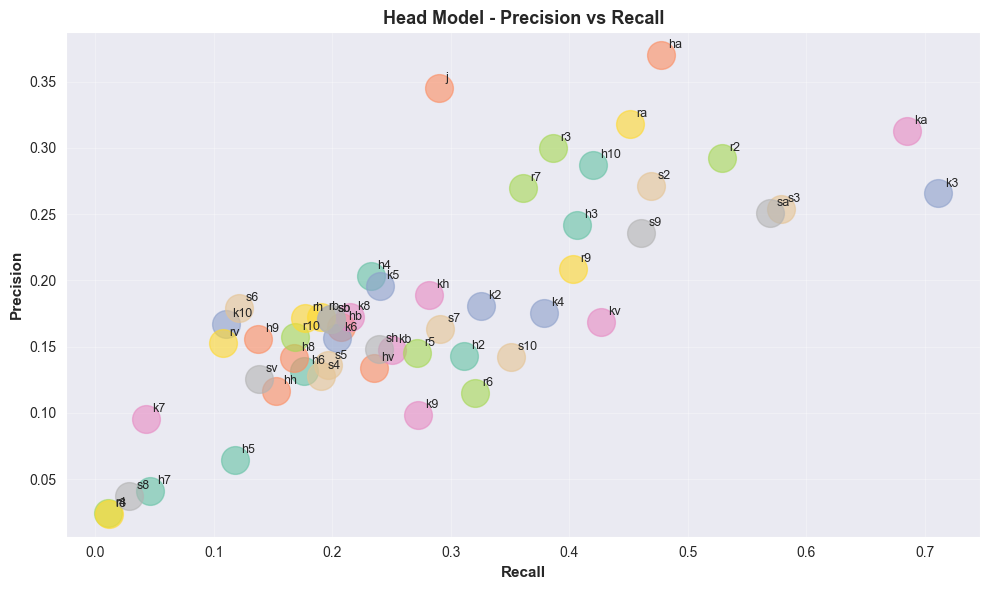

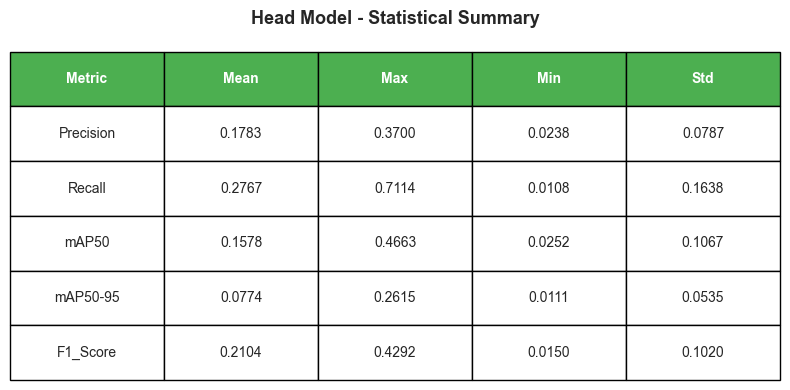


Class-wise Breakdown:

  h10:
    Precision: 0.2874
    Recall: 0.4202
    mAP50: 0.2290
    mAP50-95: 0.1294
    F1_Score: 0.3413

  h2:
    Precision: 0.1429
    Recall: 0.3111
    mAP50: 0.1179
    mAP50-95: 0.0612
    F1_Score: 0.1958

  h3:
    Precision: 0.2418
    Recall: 0.4068
    mAP50: 0.1870
    mAP50-95: 0.0916
    F1_Score: 0.3033

  h4:
    Precision: 0.2037
    Recall: 0.2324
    mAP50: 0.1677
    mAP50-95: 0.0672
    F1_Score: 0.2171

  h5:
    Precision: 0.0642
    Recall: 0.1176
    mAP50: 0.0509
    mAP50-95: 0.0215
    F1_Score: 0.0830

  h6:
    Precision: 0.1316
    Recall: 0.1765
    mAP50: 0.0696
    mAP50-95: 0.0373
    F1_Score: 0.1508

  h7:
    Precision: 0.0412
    Recall: 0.0460
    mAP50: 0.0252
    mAP50-95: 0.0111
    F1_Score: 0.0435

  h8:
    Precision: 0.1411
    Recall: 0.1679
    mAP50: 0.0822
    mAP50-95: 0.0480
    F1_Score: 0.1533

  h9:
    Precision: 0.1556
    Recall: 0.1373
    mAP50: 0.0985
    mAP50-95: 0.0543
    F1_Score: 0.1458

  h

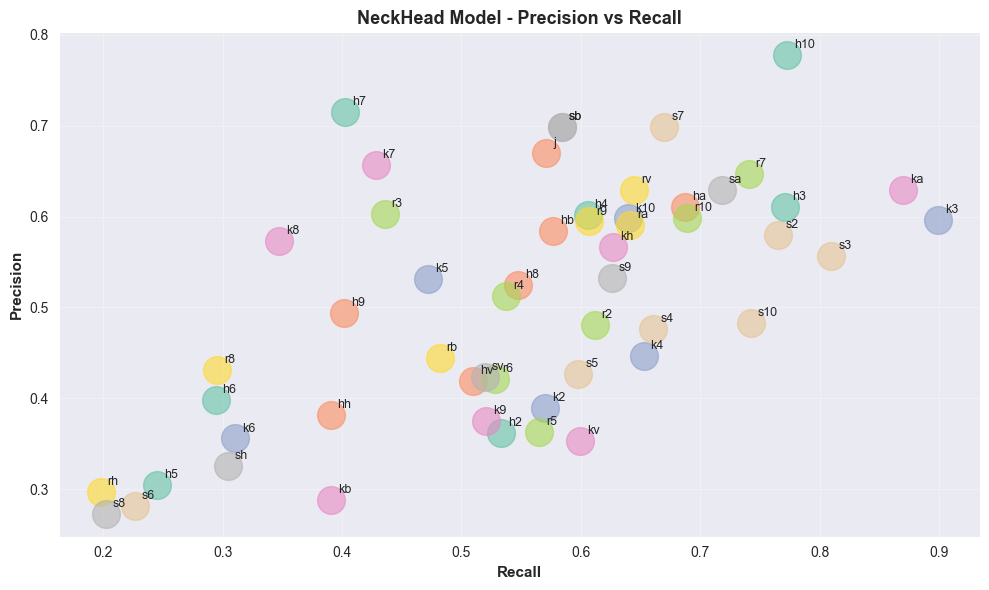

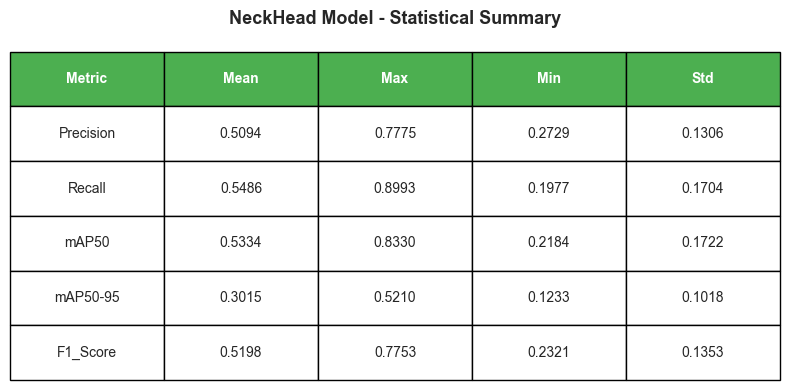


Class-wise Breakdown:

  h10:
    Precision: 0.7775
    Recall: 0.7731
    mAP50: 0.8207
    mAP50-95: 0.4716
    F1_Score: 0.7753

  h2:
    Precision: 0.3623
    Recall: 0.5333
    mAP50: 0.3894
    mAP50-95: 0.2247
    F1_Score: 0.4315

  h3:
    Precision: 0.6110
    Recall: 0.7712
    mAP50: 0.7459
    mAP50-95: 0.4695
    F1_Score: 0.6818

  h4:
    Precision: 0.6015
    Recall: 0.6056
    mAP50: 0.6556
    mAP50-95: 0.3084
    F1_Score: 0.6036

  h5:
    Precision: 0.3051
    Recall: 0.2451
    mAP50: 0.2323
    mAP50-95: 0.1247
    F1_Score: 0.2718

  h6:
    Precision: 0.3984
    Recall: 0.2941
    mAP50: 0.2978
    mAP50-95: 0.1792
    F1_Score: 0.3384

  h7:
    Precision: 0.7146
    Recall: 0.4023
    mAP50: 0.5239
    mAP50-95: 0.2892
    F1_Score: 0.5148

  h8:
    Precision: 0.5246
    Recall: 0.5474
    mAP50: 0.4667
    mAP50-95: 0.2813
    F1_Score: 0.5358

  h9:
    Precision: 0.4941
    Recall: 0.4020
    mAP50: 0.4373
    mAP50-95: 0.2271
    F1_Score: 0.4433

  h

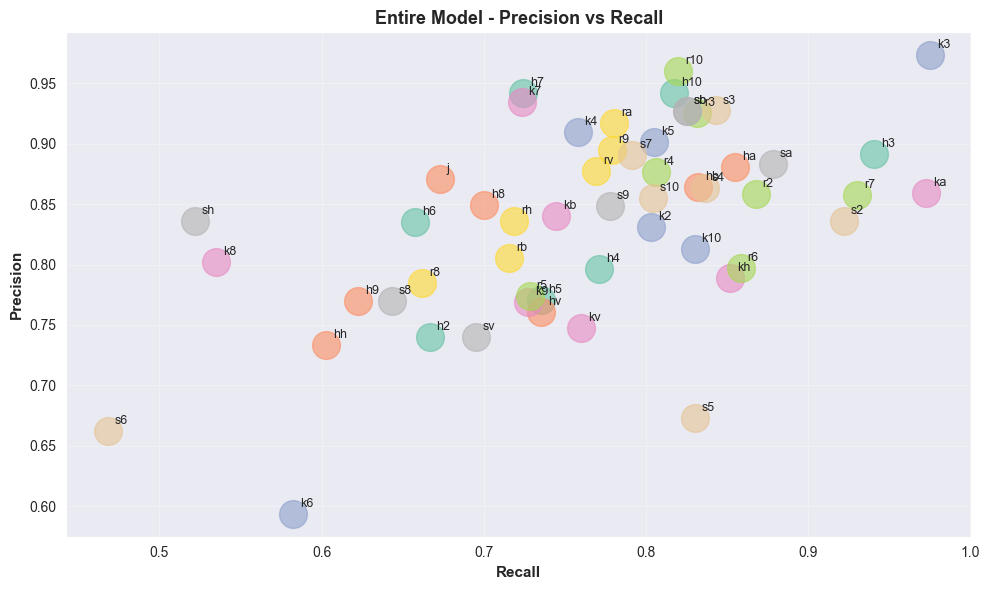

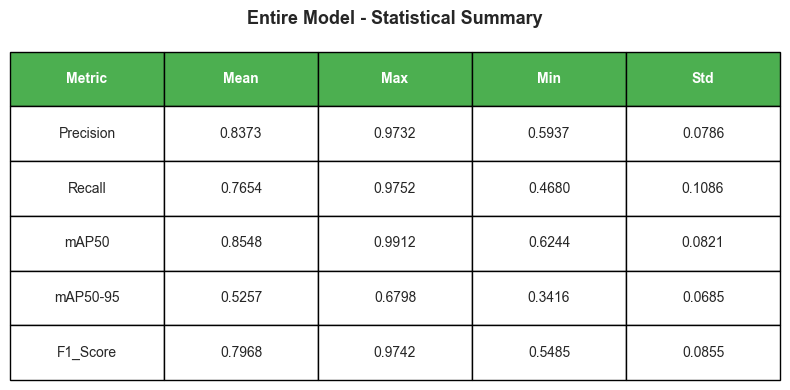


Class-wise Breakdown:

  h10:
    Precision: 0.9419
    Recall: 0.8176
    mAP50: 0.9246
    mAP50-95: 0.5752
    F1_Score: 0.8754

  h2:
    Precision: 0.7400
    Recall: 0.6667
    mAP50: 0.7553
    mAP50-95: 0.4540
    F1_Score: 0.7014

  h3:
    Precision: 0.8917
    Recall: 0.9407
    mAP50: 0.9567
    mAP50-95: 0.6322
    F1_Score: 0.9155

  h4:
    Precision: 0.7963
    Recall: 0.7710
    mAP50: 0.8614
    mAP50-95: 0.4689
    F1_Score: 0.7834

  h5:
    Precision: 0.7705
    Recall: 0.7353
    mAP50: 0.7687
    mAP50-95: 0.4262
    F1_Score: 0.7525

  h6:
    Precision: 0.8355
    Recall: 0.6575
    mAP50: 0.8314
    mAP50-95: 0.5556
    F1_Score: 0.7359

  h7:
    Precision: 0.9419
    Recall: 0.7241
    mAP50: 0.8892
    mAP50-95: 0.5691
    F1_Score: 0.8188

  h8:
    Precision: 0.8495
    Recall: 0.7004
    mAP50: 0.8468
    mAP50-95: 0.5307
    F1_Score: 0.7678

  h9:
    Precision: 0.7696
    Recall: 0.6224
    mAP50: 0.7620
    mAP50-95: 0.4251
    F1_Score: 0.6882

  h

In [28]:
# Set style
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (15, 10)

metrics_cols = ['Precision', 'Recall', 'mAP50', 'mAP50-95', 'F1_Score']

# Loop through each method and create detailed plots
for method_name, df in methods.items():
    print(f"\n{'='*60}")
    print(f"{method_name}")
    print(f"{'='*60}")
    print(df)
    print("\n")
    
    # 1. Precision vs Recall Plot
    plt.figure(figsize=(10, 6))
    colors = plt.cm.Set2(np.linspace(0, 1, len(df)))
    for i, (idx, row) in enumerate(df.iterrows()):
        plt.scatter(row['Recall'], row['Precision'], s=400, alpha=0.6, 
                   label=row['Class_Name'], color=colors[i])
        plt.annotate(row['Class_Name'], (row['Recall'], row['Precision']), 
                    xytext=(5, 5), textcoords='offset points', fontsize=9)
    plt.xlabel('Recall', fontweight='bold', fontsize=11)
    plt.ylabel('Precision', fontweight='bold', fontsize=11)
    plt.title(f'{method_name} - Precision vs Recall', fontsize=13, fontweight='bold')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # 2. Statistics Table
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.axis('tight')
    ax.axis('off')
    
    stats_data = []
    for col in metrics_cols:
        stats_data.append([
            col,
            f"{df[col].mean():.4f}",
            f"{df[col].max():.4f}",
            f"{df[col].min():.4f}",
            f"{df[col].std():.4f}"
        ])
    
    table = ax.table(cellText=stats_data, 
                      colLabels=['Metric', 'Mean', 'Max', 'Min', 'Std'],
                      cellLoc='center', loc='center', bbox=[0, 0, 1, 1])
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 2)
    
    # Style the table header
    for i in range(5):
        table[(0, i)].set_facecolor('#4CAF50')
        table[(0, i)].set_text_props(weight='bold', color='white')
    
    plt.title(f'{method_name} - Statistical Summary', fontsize=13, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()
    
    # Print stats
    print("\nClass-wise Breakdown:")
    for idx, row in df.iterrows():
        print(f"\n  {row['Class_Name']}:")
        for col in metrics_cols:
            print(f"    {col}: {row[col]:.4f}")

print("\n" + "="*60)
print("CROSS-METHOD COMPARISON")
print("="*60)

# Create comparison dataframe
comparison_data = []
for method_name, df in methods.items():
    for idx, row in df.iterrows():
        comparison_data.append({
            'Method': method_name,
            'Class': row['Class_Name'],
            'Precision': row['Precision'],
            'Recall': row['Recall'],
            'mAP50': row['mAP50'],
            'mAP50-95': row['mAP50-95'],
            'F1_Score': row['F1_Score']
        })

comparison_df = pd.DataFrame(comparison_data)

# Summary by method
print("\nAverage Metrics by Method:")
print(comparison_df.groupby('Method')[metrics_cols].mean().round(4))